# Step 1: Sentiment Labeling
In this step, we apply sentiment analysis to label each email message as Positive, Negative, or Neutral. The labeling is based on the message body using a sentiment analysis tool.

In [16]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the uploaded CSV file
df = pd.read_csv(r"C:\Users\Firoz Ahmed\Downloads\test(in).csv")

# Display basic info and a sample of the data to understand its structure
df_info = df.info()
df_sample = df.head(5)

df_sample


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


#### Task 1: Sentiment Labeling

In [15]:
# Function to map polarity to sentiment
def get_sentiment_textblob(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis using TextBlob
df['Sentiment'] = df['body'].apply(get_sentiment_textblob)

# Show a sample of the results
df[['Sentiment','body']]

,Sentiment,body
0,Positive,EnronOptions Announcement\n\n\nWe have updated...
1,Negative,"Marc,\n\nUnfortunately, today is not going to ..."
2,Neutral,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ..."
3,Negative,we were thinking papasitos (we can meet somewh...
4,Neutral,Since you never gave me the $20 for the last t...
...,...,...
2186,Positive,Thanks for the resume. She has had some good ...
2187,Positive,Attached please find the following documents:\...
2188,Positive,Good to finally hear from. Judging from your ...
2189,Neutral,It looks like we have our 12 teams. We will p...


#### Task 02: EDA

# Step 2: Exploratory Data Analysis (EDA)
We explore the structure of the data, check for missing values, and visualize the distribution and trends of sentiment across time.

In [17]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [19]:
# Basic summary
summary = {
    'Total Records': len(df),
    'Missing Values': df.isnull().sum(),
    'Data Types': df.dtypes,
    'Unique Senders': df['from'].nunique(),
    'Sentiment Distribution': df['Sentiment'].value_counts()
}
summary

{'Total Records': 2191,
 'Missing Values': Subject      0
 body         0
 date         0
 from         0
 Sentiment    0
 dtype: int64,
 'Data Types': Subject              object
 body                 object
 date         datetime64[ns]
 from                 object
 Sentiment            object
 dtype: object,
 'Unique Senders': 10,
 'Sentiment Distribution': Sentiment
 Positive    1144
 Neutral      817
 Negative     230
 Name: count, dtype: int64}

In [21]:
# Trend: Sentiment over time (monthly)
df['month'] = df['date'].dt.to_period('M')
monthly_sentiment = df.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)
monthly_sentiment

Sentiment,Negative,Neutral,Positive
month,,,
2010-01,8,39,44
2010-02,8,32,51
2010-03,10,41,40
2010-04,7,40,45
2010-05,12,32,47
2010-06,13,27,52
2010-07,12,35,44
2010-08,10,35,46
2010-09,8,39,44


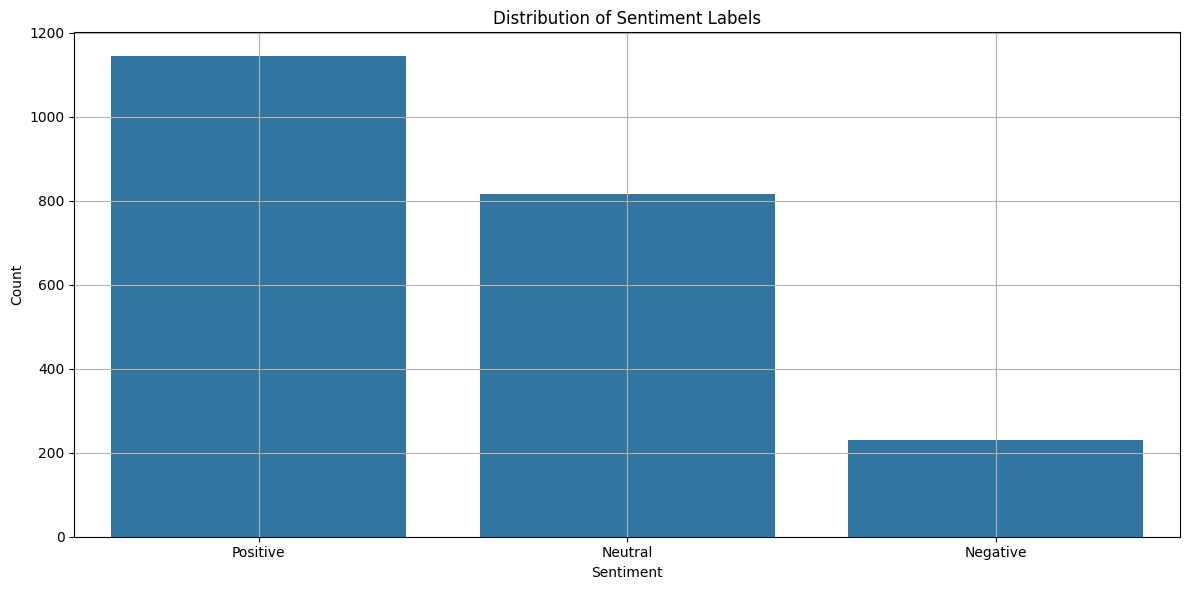

In [22]:
# Visualizations - 01
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

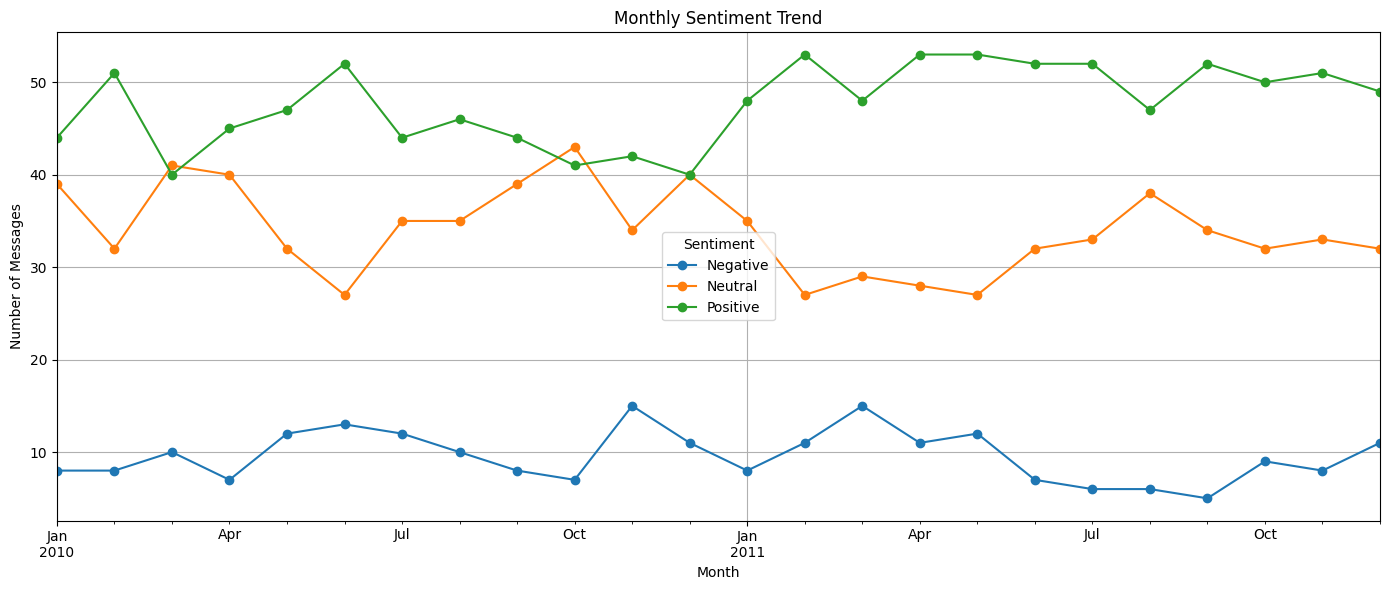

In [25]:
# Visualizations - 02
monthly_sentiment.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Monthly Sentiment Score Calculation
We assign sentiment scores to each message and aggregate them monthly per employee. This will help with ranking and risk analysis.

#### Task 3: Employee Score Calculation

In [27]:
# Define score mapping
sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Assign score to each message
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_score_map)

# Group by sender and month to aggregate sentiment scores
monthly_scores = (
    df.groupby(['from', 'month'])['Sentiment_Score']
    .sum()
    .reset_index()
    .rename(columns={'from': 'Employee', 'Sentiment_Score': 'Monthly_Sentiment_Score'})
)
monthly_scores

,Employee,month,Monthly_Sentiment_Score
0,bobette.riner@ipgdirect.com,2010-01,2
1,bobette.riner@ipgdirect.com,2010-02,8
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,1
...,...,...,...
235,sally.beck@enron.com,2011-08,6
236,sally.beck@enron.com,2011-09,1
237,sally.beck@enron.com,2011-10,4
238,sally.beck@enron.com,2011-11,5


#### Task 4: Employee Ranking



In [28]:
# Sort and rank top 3 positive employees per month
top_positive = (
    monthly_scores.sort_values(by=['month', 'Monthly_Sentiment_Score', 'Employee'], ascending=[True, False, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_positive['Rank_Type'] = 'Top Positive'

# Sort and rank top 3 negative employees per month
top_negative = (
    monthly_scores.sort_values(by=['month', 'Monthly_Sentiment_Score', 'Employee'], ascending=[True, True, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_negative['Rank_Type'] = 'Top Negative'

# Combine both rankings
employee_ranking = pd.concat([top_positive, top_negative]).sort_values(by=['month', 'Rank_Type'])
employee_ranking


,Employee,month,Monthly_Sentiment_Score,Rank_Type
0,rhonda.denton@enron.com,2010-01,0,Top Negative
1,johnny.palmer@enron.com,2010-01,1,Top Negative
2,bobette.riner@ipgdirect.com,2010-01,2,Top Negative
0,kayne.coulter@enron.com,2010-01,8,Top Positive
1,don.baughman@enron.com,2010-01,5,Top Positive
...,...,...,...,...
70,johnny.palmer@enron.com,2011-12,2,Top Negative
71,eric.bass@enron.com,2011-12,3,Top Negative
69,lydia.delgado@enron.com,2011-12,6,Top Positive
70,patti.thompson@enron.com,2011-12,6,Top Positive


#### Task 5: Flight Risk Identification



# Step 4: Employee Ranking
Using the monthly sentiment scores, we identify the top 3 positive and top 3 negative employees per month based on their communication tone.

In [30]:
# Filter only negative messages
negative_msgs = df[df['Sentiment'] == 'Negative'].copy()

# Convert date column to datetime if not already
negative_msgs['date'] = pd.to_datetime(negative_msgs['date'], errors='coerce')

# Sort by employee and date
negative_msgs = negative_msgs.sort_values(by=['from', 'date'])

# Identify flight risks: 4 or more negative messages within any 30-day rolling window
flight_risks = set()

# Group by employee and perform rolling count
for emp, group in negative_msgs.groupby('from'):
    dates = group['date'].sort_values().tolist()
    for i in range(len(dates) - 3):
        if (dates[i + 3] - dates[i]).days <= 30:
            flight_risks.add(emp)
            break  # No need to check further for this employee

# Create a DataFrame of at-risk employees
flight_risk_df = pd.DataFrame({'Employee': list(flight_risks)}).sort_values(by='Employee')
flight_risk_df


,Employee
6,bobette.riner@ipgdirect.com
1,eric.bass@enron.com
0,john.arnold@enron.com
3,johnny.palmer@enron.com
5,lydia.delgado@enron.com
2,patti.thompson@enron.com
4,rhonda.denton@enron.com
7,sally.beck@enron.com


#### Task 6: Predictive Modeling

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a feature set for modeling
# Use: number of messages sent in a month and the month as numeric (time progression)
message_counts = df.groupby(['from', 'month']).size().reset_index(name='Message_Count')
model_data = pd.merge(monthly_scores, message_counts, left_on=['Employee', 'month'], right_on=['from', 'month'])
model_data['Month_Num'] = model_data['month'].apply(lambda x: x.to_timestamp().toordinal())

# Features and target
X = model_data[['Message_Count', 'Month_Num']]
y = model_data['Monthly_Sentiment_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_
})

results_summary = {
    'Mean Squared Error': mse,
    'R2 Score': r2,
    'Intercept': reg.intercept_
}

coefficients

,Feature,Coefficient
0,Message_Count,0.389857
1,Month_Num,0.001230


# Step 5: Flight Risk Identification
We flag employees who sent 4 or more negative messages within any rolling 30-day period. These employees are considered flight risks.

# Step 6: Predictive Modeling
We build a linear regression model to predict monthly sentiment scores using features such as message count and time. We evaluate the model using standard metrics.